# Extra advanced material and exercises



There is some extra material here that introduces

[3D images and videos](#3-D-images-and-videos )

[Segmentation with watershedding](#Segmentation-with-watershedding)

[Notebook tricks on documentation](#Notebook-tricks-on-documentation)

[Noise: subtracting and adding](#Noise:-subtracting-and-adding)

and

[Template Matching](#Template-matching)


In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage


from skimage import data, util, filters, color
from skimage.segmentation import watershed

%matplotlib widget

<a id='#Section_1'></a>

 ## 3-D images and videos 

The main material for our course deals with 2 dimensional images. However images can be three dimensional, for example a CT or MRI of the human brain. Images can even be four dimensional, for example a moving real-time image of a fetus through ultrasound. Check out this lovely image as an example: https://en.wikipedia.org/wiki/File:Fetal_yawning_4D_ultrasound_ecografia_4D_Dr._Wolfgang_Moroder.theora.ogv

How do we understand images that are more than just a plane? Conceputally we could think of 3-D images as a sequence of multiple 2D images stacked on each other. But this idea takes away the critical fact that we are dealing with something made of small cubes instead of pixels (small squares). We now are dealing in voxels. As pixels were to 2D images, voxels are to 3D images. Voxels is a concatenation from volume and element. 


Check out this code (adapted from Matplotlib documentation )  to see (and here we mean literally visualize) what we mean:

In [ ]:
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 4, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-2, 0, 2] = True
n_voxels[1, 0, :] = True
n_voxels[2, 0, :] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7733ff')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
#ax.set_aspect()

plt.show()


You should see something that looks like a cube made of cubes. This is the idea of a voxel. It is about volumes.

We can use skimage to work with voxels just as we use it to work with pixels. In fact there are even instructions in the documentation:

https://scikit-image.org/skimage-tutorials/lectures/three_dimensional_image_processing.html

Read the documentation, but note you do not have all the libraries available to run the code snippets.

Advanced exercise #1 : Create your own 3D image (hint: images are arrays), see what happens when you use plt.imshow to display it

The awnsers are in the lower cell blocks

## Segmentation with watershedding

### Watershedding is a type of segmentation algorithm

Segmentation is seperating different objects inside an image. For example if we have a body CT , and we want to build an algorithm that looks at only the bony structures we may want to perform a segmentation  to segment only the bones. In this case you might guess the idea behind segmentation could very simple, as the bones will be of very different pixel intensity values than surrounding tissue. But in other cases things may not be so simple. There are many different algorithms used for segmentation. This course will touch on the edge of a few, but one that is popular, and not covered is watershedding.

Read the documentation for watershedding in skimage here: 
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html



In reality watershedding is a group of algorithms with variation. One variant offered in skimage can be read on here:
    
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_compact_watershed.html


Exercise 2: use the boiler plate code below and see if you can make a better watershed than the offered compact watershed? 

Hint: check the parameters of the function here: https://scikit-image.org/docs/stable/api/skimage.segmentation.html#skimage.segmentation.watershed

Is a watershed the best algorithm for this segmentation?

In [ ]:


coins = data.coins()
edges = filters.sobel(coins)

grid = util.regular_grid(coins.shape, n_points=468)

seeds = np.zeros(coins.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.1)
# YOU CHANGE W2
w2 = watershed(edges, seeds, compactness=0.1)
# setting values to rows and column variables 
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(coins)
#axs[0, 0].xticks= False
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(color.label2rgb(w0, coins, bg_label=-1))
axs[0,0].axis('off')
axs[0, 1].set_title('Simple Watershed')
axs[0, 1].axis('off')
axs[1, 0].imshow(color.label2rgb(w1, coins, bg_label=-1))
axs[1,0].axis('off')
axs[1, 0].set_title('Compact Watershed')
axs[1, 1].imshow(color.label2rgb(w2, coins, bg_label=-1))
axs[1, 1].set_title('Your solution (improve it!)')
axs[1,1].axis('off')




## Notebook tricks on documentation

So by now you may catch on that the documentation of skimage is a great resource. But sometimes you just want to look at things more precisely. In this case it helps to know how to call the documentaion or docstrings from you cell. All the drama of opening a new webpage is too much. 

Exercise# 3a:

Call the docstring on a np.array from your cell

Exercise # 3b

Imagine you want to figure out something about boundaries inside skimage handled images. You read it somewhere in the skimage documentation, and you are sure of it. But searching pages of the internet gets you nowhere.
Is there one line of code you can use to find where to look in the documentation? Hint skimage images are numpy arrays.

## Noise: subtracting and adding

In different cases you may want to minimize noise in your images, or add more of it. Let's start by understanding noise

Noise (in terms of signal processing) is something present in any signals is not part of the desired true signal. Images are signals which can have noise or other types of artifacts that have nothing to do with the actual scene captured. In contrast with other artifacts noise tends to be pretty random. 

Let's get an image of what we are talking about:

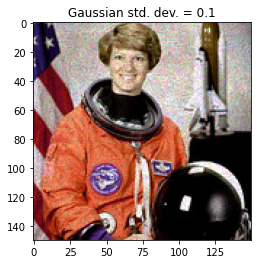

The image aboove is grainy. (It is also a famous image for image processors for political reasons). In many cases we would want to reduce noit and give a nice clearer image like this:

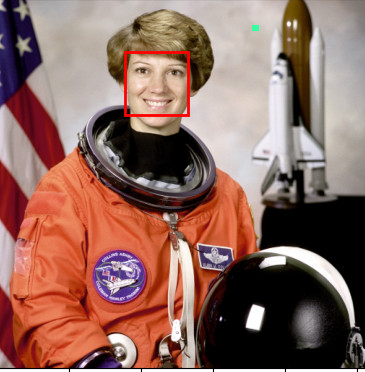

Now the image above is clearer, but has some 'artifacts' e.g. the green square. Notice how non-random it is compared to noise.


You might be confused into thinking we should denoise everything as much as possible. But that is wrong. 

Exercise 4a: Think of two situations in which you would want to add noise to an image

Let's take a look at some skimage documentation on denoising: https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html

In [ ]:
There us complicated stuff under the hood, but fortunately skimage makes these algorithms easy to implement.

In [ ]:
Exercise 4b: Think of two situations where you would want to denoise an image

## Template matching

In some cases we know what we are looking for in an image, just not exactly where to find it. We are looking for a specific image patch somehwere
For example imagine you have a dataset of ultrasound images with a muscle name written  into the image on only some of them. Something tells you this is not a goood idea since your machine learning algorithm seeks to classify which muscle the ultrasound was of. Essentially you have the label in some imaghes, and you need to get it off.  On one image  with a specific image patch, we can handle this manually. But what if we have to find such images out of 500,000?

Skimage has template matching capacity. Read more about that here: 
https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html

Advanced exerfcise #5:

Imagine you have a set of 500,000 ultrasounds, with the muscle name potentially burned into the images by a technician typing the name into one corner. think of hour algorithmic approaches you coud consider to deal with the problem.

# Awnsers for advanced exercises

Advanced exercise #1 : Create your own 3D image!
PossibleAwnser:

In [ ]:
image_array = np.array([[[1., 0.01, 0.25, 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 0.2, 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 0.4, 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [ ]:
plt.imshow(image_array)

We get a picture of only one "face of the cube" when we try t use matplotlib.pyplot.imshow. Often libraries such as pltly are useful to visualize 3D images.

Advanced exercise #2 : Create your own watershedding oe better segmentation example


PossibleAwnser:

In [ ]:


coins = data.coins()
edges = filters.sobel(coins)

grid = util.regular_grid(coins.shape, n_points=468)

seeds = np.zeros(coins.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.1)
w2 = watershed(edges, seeds, connectivity=0.5, compactness=0.0001)

# setting values to rows and column variables 
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(coins)
#axs[0, 0].xticks= False
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(color.label2rgb(w0, coins, bg_label=-1))
axs[0,0].axis('off')
axs[0, 1].set_title('Simple Watershed')
axs[0, 1].axis('off')
axs[1, 0].imshow(color.label2rgb(w1, coins, bg_label=-1))
axs[1,0].axis('off')
axs[1, 0].set_title('Compact Watershed')
axs[1, 1].imshow(color.label2rgb(w2, coins, bg_label=-1))
axs[1, 1].set_title('Your solution (improve it!)')
axs[1,1].axis('off')

Is a watershed as applied here the best algorithm for this segmentation?

Probably not. While we can improve our watershed in theory forever, with some predictableadditions thigns will be much better.

Take a look at the following:
    
 https://scikit-image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html

Awnser to #3a

In [ ]:
np.array?


Awnser to #3b

In [ ]:
np.lookfor('boundaries', 'skimage') 

Awnser #4a:

1a.You might want to use noise for artistic purposes. There are filters in popular artistic image processing e.g. Gimp or Photoshop programs that add noise.

2a. You might want to randomly add a little noise to images as a way to make augmented images for machine learning

Awnser #4b

1b. You might want to denoise an image to increase human interpretability (this is often the case with medical images)

2b. You might want to denoise an image to increase the accuracy of object detection and area summation or counting if the noise is so bad it intereferes with these

Awnser #5:

You could use an optical charecter recognition to recognize text, you could use template mathching to look for the exact text as you expect it to appear, or you could simply crop the image edges off or draw rectangeles over all edges in every image.

In fact there are even more solutions. There is usually more than one way to accomplish your goals!
